In [57]:
import pandas as pd
from collections import Counter

# Section 1: Understanding the Dataset

In this section, the goal was to load and explore the provided question-answer dataset, identify its structure, and handle any missing or inconsistent data.

Before starting work with the dataset, a visual analysis of the data was performed, where some complicating factors in handling the dataset were identified. The image was removed, and the column header line was corrected.

Another point identified was that in some rows there was no separation between the question and answer. But to maintain the sequence of work in this evaluation simulating a larger dataset, the corrections will be made through code.

With original xlsx file

In [2]:
df = pd.read_excel("/home/aragy/Huma.ai-assessment/Dataset/Question-Answer dataset..xlsx")

I decided to first test reading the dataset with XLSX, and as expected, when importing the dataset with pandas, the DataFrame was messy.

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,23011(Q) Huma Q1 Qual Follow-ups,NaN,NaN,NaN,NaN
1,Country,Requester_Type,Product,Indication,Question,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Channel,Date_Time_Open,Date_Time_Closed,Answer/Solution
3,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,2023-06-27 17:00:00,2023-07-21 18:00:00,"Common side effects include fatigue, nausea, a..."
4,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,2023-06-08 08:00:00,2023-07-06 12:30:00,"Yes, Keytruda can cause immune-related adverse..."


I exported the document to CSV, correcting the headers, and then imported it again.

with file exported to csv and correction in headers

In [4]:
df = pd.read_csv("/home/aragy/Huma.ai-assessment/Dataset/Question-Answer dataset.csv", delimiter=';')

In [5]:
df.head()

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer/Solution
0,UK,HCP,Keytruda,NSCLC,What are the common side effects of Keytruda?,email,27/06/2023 17:00,21/07/2023 18:00,"Common side effects include fatigue, nausea, a..."
1,US,Researcher,Keytruda,NSCLC,Can Keytruda cause immune-related adverse effe...,email,08/06/2023 8:00,06/07/2023 12:30,"Yes, Keytruda can cause immune-related adverse..."
2,UK,HCP,Keytruda,NSCLC,Is Keytruda safe for pregnant women?,call,06/03/2023 4:00,19/04/2023 15:00,Keytruda is not recommended for use during pre...
3,UK,Researcher,Keytruda,NSCLC,What should patients report immediately while ...,email,05/02/2023 10:30,05/03/2023 6:00,Patients should report any new or worsening sy...
4,US,Researcher,Keytruda,NSCLC,Are there any known interactions between Keytr...,call,14/03/2023 9:30,16/04/2023 18:30,"Yes, Keytruda can interact with steroids and c..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           50 non-null     object
 1   Requester_Type    50 non-null     object
 2   Product           50 non-null     object
 3   Indication        50 non-null     object
 4   Question          48 non-null     object
 5   Channel           50 non-null     object
 6   Date_Time_Open    50 non-null     object
 7   Date_Time_Closed  50 non-null     object
 8   Answer/Solution   46 non-null     object
dtypes: object(9)
memory usage: 3.6+ KB


In [7]:
df[['Country','Requester_Type','Product', 'Indication']].describe()

,Country,Requester_Type,Product,Indication
count,50,50,50,50
unique,3,3,1,1
top,UK,HCP,Keytruda,NSCLC
freq,20,19,50,50


Start to clean the data

In [8]:
df.isnull().sum()

Country             0
Requester_Type      0
Product             0
Indication          0
Question            2
Channel             0
Date_Time_Open      0
Date_Time_Closed    0
Answer/Solution     4
dtype: int64

In [9]:
df[df['Question'].isnull()]

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer/Solution
36,Canada,Researcher,Keytruda,NSCLC,NaN,call,03/04/2023 13:30,01/05/2023 18:30,Q: What was the primary outcome of the KEYNOTE...
37,UK,HCP,Keytruda,NSCLC,NaN,call,24/03/2023 21:00,29/04/2023 12:00,Q: How did Keytruda perform in NSCLC patients ...


In [10]:
df[df['Answer/Solution'].isnull()]

,Country,Requester_Type,Product,Indication,Question,Channel,Date_Time_Open,Date_Time_Closed,Answer/Solution
22,Canada,Researcher,Keytruda,NSCLC,What resources are available for patients on K...,call,19/01/2023 10:00,29/01/2023 3:00,NaN
30,UK,Researcher,Keytruda,NSCLC,Q: What was the impact of Keytruda on quality ...,call,03/04/2023 8:30,25/04/2023 10:00,NaN
31,US,HCP,Keytruda,NSCLC,Q: Were there any notable differences in effic...,call,03/05/2023 0:00,30/05/2023 23:00,NaN
34,UK,HCP,Keytruda,NSCLC,Q: What are the recommended dosing guidelines ...,email,14/02/2023 5:00,19/03/2023 1:00,NaN


Since some questions and answers are combined in the Answer/Solution column, we need to separate this information.

Extract the question and answer from the Answer/Solution column and fill in the Question and Answer/Solution columns accordingly.

In [11]:
def extract_question_answer(row):
    if pd.isnull(row['Question']) and isinstance(row['Answer/Solution'], str):
        if 'Q:' in row['Answer/Solution'] and 'A:' in row['Answer/Solution']:
            qa_parts = row['Answer/Solution'].split('A:')
            question_part = qa_parts[0].replace('Q:', '').strip()
            answer_part = qa_parts[1].strip()
            row['Question'] = question_part
            row['Answer/Solution'] = answer_part

    if pd.isnull(row['Answer/Solution']) and isinstance(row['Question'], str):
        if 'Q:' in row['Question'] and 'A:' in row['Question']:
            qa_parts = row['Question'].split('A:')
            question_part = qa_parts[0].replace('Q:', '').strip()
            answer_part = qa_parts[1].strip()
            row['Question'] = question_part
            row['Answer/Solution'] = answer_part
    return row

In [12]:
df = df.apply(extract_question_answer, axis=1)

In [13]:
df.isnull().sum()

Country             0
Requester_Type      0
Product             0
Indication          0
Question            0
Channel             0
Date_Time_Open      0
Date_Time_Closed    0
Answer/Solution     1
dtype: int64

transform datatime format

In [14]:

df['Date_Time_Open'] = pd.to_datetime(df['Date_Time_Open'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Date_Time_Closed'] = pd.to_datetime(df['Date_Time_Closed'], format='%d/%m/%Y %H:%M', errors='coerce')


In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

Country             0
Requester_Type      0
Product             0
Indication          0
Question            0
Channel             0
Date_Time_Open      0
Date_Time_Closed    0
Answer/Solution     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           49 non-null     object        
 1   Requester_Type    49 non-null     object        
 2   Product           49 non-null     object        
 3   Indication        49 non-null     object        
 4   Question          49 non-null     object        
 5   Channel           49 non-null     object        
 6   Date_Time_Open    49 non-null     datetime64[ns]
 7   Date_Time_Closed  49 non-null     datetime64[ns]
 8   Answer/Solution   49 non-null     object        
dtypes: datetime64[ns](2), object(7)
memory usage: 3.8+ KB


Normalize column names

In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country           49 non-null     object        
 1   requester_type    49 non-null     object        
 2   product           49 non-null     object        
 3   indication        49 non-null     object        
 4   question          49 non-null     object        
 5   channel           49 non-null     object        
 6   date_time_open    49 non-null     datetime64[ns]
 7   date_time_closed  49 non-null     datetime64[ns]
 8   answer_solution   49 non-null     object        
dtypes: datetime64[ns](2), object(7)
memory usage: 3.8+ KB


Saving the cleaned dataset

In [58]:
df.to_csv("/home/aragy/Huma.ai-assessment/Dataset/cleaned_dataset.csv")

### Summary
1. Identification of Issues:

    * Performed a visual inspection of the dataset.
    * Noted that some questions and answers were combined in the Answer/Solution column.
    * Recognized that some headers were misaligned, and unnecessary image data was present.

2. Data Import and Initial Corrections:

    * Attempted to read the dataset in XLSX format, but the DataFrame was disorganized.
    * Exported the dataset to CSV, correcting the headers.
    * Imported the CSV file using pandas with the correct delimiter.

3. Handling Combined Questions and Answers:

    * Created a function to extract questions and answers from the Answer/Solution column where they were combined.
    * Updated the Question and Answer/Solution columns accordingly.
    * Drop row without Answer/Solution

4. Data Type Conversion:

    * Converted Date_Time_Open and Date_Time_Closed columns to datetime objects.
    * Ensured that dates are in the correct format and handled parsing errors.

5. Standardizing Column Names:

    * Renamed columns to lowercase and replaced spaces and slashes with underscores for consistency.

6. Cleaning the DataFrame:
    
    * Dropped duplicate entries to maintain data integrity.(no effect - no duplicates)

### Summary of the Dataset

After cleaned, the dataset comprises 49 entries, each representing a question-and-answer pair related to **Keytruda**, a medication used in the treatment of **Non-Small Cell Lung Cancer (NSCLC)**. The dataset includes detailed information about inquiries made by different types of requesters from various countries. Below is an overview of the dataset's structure and content:

**Columns:** 

* __Country:__ The country of the requester (e.g., UK, US, Canada).
* __Requester_Type:__ The type of requester, such as Healthcare Professionals (HCP), Researchers, and Pharmacists.
* __Product:__ The product in question, which is Keytruda for all entries.
* __Indication:__ The medical indication, with all entries focusing on NSCLC.
* __Question:__ The specific question asked by the requester, covering topics like side effects, efficacy, dosage guidelines, combination therapies, and patient support.
* __Channel:__ The communication channel used to submit the inquiry, either email or call.
* __Date_Time_Open:__ The timestamp when the question was initially posed.
* __Date_Time_Closed:__ The timestamp when the question was answered or the inquiry was closed.
* __Answer_Solution:__ The answer provided to the question, offering detailed information relevant to the inquiry.

# Bonus Section: Exploratory Data Analysis (EDA)

In this bonus section, we perform an exploratory data analysis (EDA) to gain insights into the structure and characteristics of the dataset before diving into the Retrieval-Augmented Generation (RAG) tasks. The objective is to explore the dataset's distribution, identify key patterns, and visualize the data for better understanding.

Note: It is important to understand that this is a small sample, which may not reflect the real picture. Each analysis may be wrong if there is bias in the sampling.

In [21]:
Counter(df['country'])

Counter({'UK': 20, 'US': 15, 'Canada': 14})

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_38430/4253856706.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


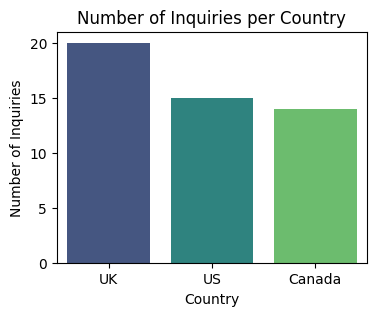

In [23]:
country_counts = df['country'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Number of Inquiries per Country')
plt.xlabel('Country')
plt.ylabel('Number of Inquiries')
plt.show()

In this chart is observed that the United Kingdom (UK) leads in terms of the number of queries, followed by the United States (US) and Canada. This may indicate that the service or product under analysis has greater interest or demand in the UK, suggesting a stronger presence or a more engaged target market or a bias in the sampling. If the sample reflect the real observation, the difference between the number of queries in the UK and other countries may also reflect variations in marketing campaigns, outreach strategies or the specific needs of consumers in each location.

/tmp/ipykernel_38430/3373145464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=requester_counts.index, y=requester_counts.values, palette='magma')


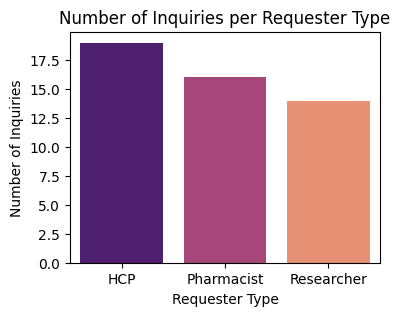

In [24]:

requester_counts = df['requester_type'].value_counts()


plt.figure(figsize=(4,3))
sns.barplot(x=requester_counts.index, y=requester_counts.values, palette='magma')
plt.title('Number of Inquiries per Requester Type')
plt.xlabel('Requester Type')
plt.ylabel('Number of Inquiries')
plt.show()


This one shows that the largest number of queries come from HCPs (Health Care Professionals), followed by pharmacists and researchers. This suggests that the service or product is highly relevant to healthcare professionals, perhaps because it is related to medical treatments, equipment or information that directly affects their daily work. The substantial interest from pharmacists and researchers also points to a possible scientific or clinical value of the product, which is recognized beyond the direct clinical setting, also reaching the research and development sector.

/tmp/ipykernel_38430/3742348371.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='cool')


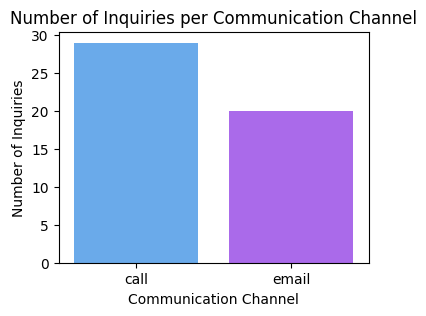

In [25]:
channel_counts = df['channel'].value_counts()

plt.figure(figsize=(4,3))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette='cool')
plt.title('Number of Inquiries per Communication Channel')
plt.xlabel('Communication Channel')
plt.ylabel('Number of Inquiries')
plt.show()


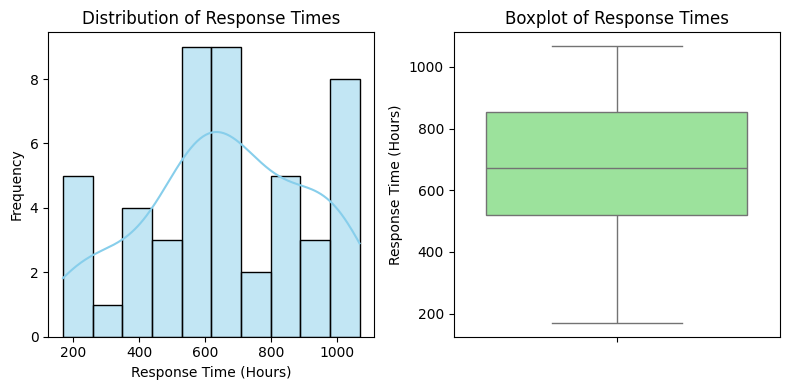

In [26]:
df['response_time_hours'] = (df['date_time_closed'] - df['date_time_open']).dt.total_seconds() / 3600
# Setting up the figure
plt.figure(figsize=(8, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['response_time_hours'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (Hours)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['response_time_hours'], color='lightgreen')
plt.title('Boxplot of Response Times')
plt.ylabel('Response Time (Hours)')

plt.tight_layout()
plt.show()


The distribution shows a spread of response times that range from around 200 to 1000 hours, with a noticeable peak between 500 and 700 hours. This indicates that most responses tend to fall within this range, suggesting a typical response window of approximately 3 weeks (considering 24-hour days).

In the boxplot we can see the IQR that is concentrated between about 600 to 800 hours, with a median around 700 hours. The lower and upper whiskers extend from about 200 to 900 hours, indicating some variation in response times but not excessively so. There do not appear to be any extreme outliers, which implies that the response times are generally consistent but could still benefit from optimization to reduce the average time taken.

/tmp/ipykernel_38430/3900017567.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='requester_type', y='response_time_hours', data=avg_response_time, palette='autumn')


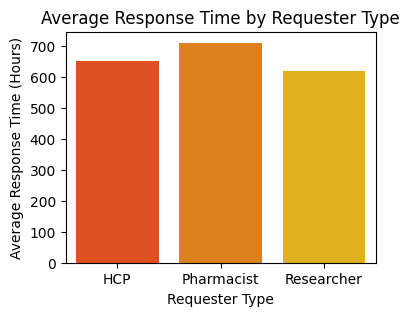

In [27]:

avg_response_time = df.groupby('requester_type')['response_time_hours'].mean().reset_index()


plt.figure(figsize=(4,3))
sns.barplot(x='requester_type', y='response_time_hours', data=avg_response_time, palette='autumn')
plt.title('Average Response Time by Requester Type')
plt.xlabel('Requester Type')
plt.ylabel('Average Response Time (Hours)')
plt.show()


This chart shows that pharmacists experience the highest average response time, followed by Health Care Professionals (HCPs) and researchers. This suggests that inquiries from pharmacists take the longest time to be addressed, which could indicate either a higher complexity in the questions they ask or a lower priority given to their requests. Health Care Professionals also face relatively long response times, while researchers seem to receive answers more quickly. This might imply a need to evaluate the processes or prioritize resources to ensure more efficient communication across all types of requesters, especially pharmacists.

In [39]:
import nltk
from nltk.tokenize import word_tokenize


In [45]:
df['question_token_count'] = df['question'].apply(lambda x: len(word_tokenize(str(x))))
df['answer_token_count'] = df['answer_solution'].apply(lambda x: len(word_tokenize(str(x))))

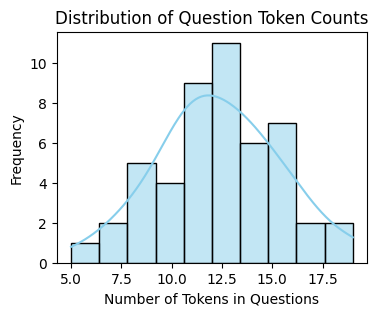

In [50]:
plt.figure(figsize=(4,3))
sns.histplot(df['question_token_count'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Question Token Counts')
plt.xlabel('Number of Tokens in Questions')
plt.ylabel('Frequency')
plt.show()


This histogram is about of the number of tokens in questions. The distribution appears to be roughly normal, with a peak around 10 to 12 tokens. Most questions tend to have between 7 to 15 tokens, indicating that the questions are generally concise and straightforward, possibly aiming to minimize ambiguity or complexity. The slight skew towards longer questions might suggest that while most inquiries are short, a few require more elaboration or context, which could be due to the nature of the information being requested.

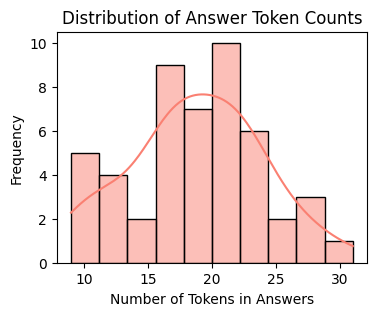

In [51]:
plt.figure(figsize=(4,3))
sns.histplot(df['answer_token_count'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Answer Token Counts')
plt.xlabel('Number of Tokens in Answers')
plt.ylabel('Frequency')
plt.show()


This histogram presents the number of tokens in the answers. This distribution is more spread out than the question token count, with a noticeable peak between 15 to 20 tokens, but also significant occurrences of answers with 10 to 30 tokens. The longer range of token counts in answers suggests that responses are more variable in length, likely depending on the complexity of the questions and the level of detail required in the answers. The distribution is slightly skewed towards shorter answers, but there are still a fair number of longer responses, indicating a balance between providing concise information and comprehensive details.

/tmp/ipykernel_38430/1302181006.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='requester_type', y='question_token_count', data=df, palette='pastel')


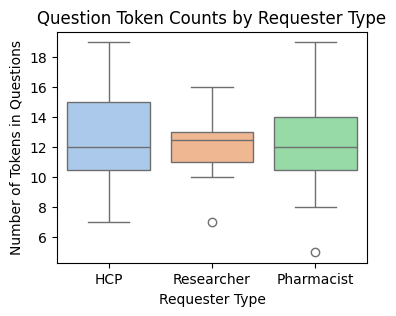

In [52]:
plt.figure(figsize=(4,3))
sns.boxplot(x='requester_type', y='question_token_count', data=df, palette='pastel')
plt.title('Question Token Counts by Requester Type')
plt.xlabel('Requester Type')
plt.ylabel('Number of Tokens in Questions')
plt.show()


Analysing the number of tokens in answers for different requester types, we have:

   * **HCP**: The median number of tokens for answers to HCPs is around 20, with a relatively wide IQR from approximately 15 to 25 tokens. This indicates a moderate variability in the length of answers, with some answers being considerably shorter or longer.
   * **Researchers**: The median answer length for Researchers is slightly higher, around 22 tokens, and the IQR is narrower, suggesting more consistency in the length of answers provided to them. The shorter whiskers indicate less variability overall.
   * **Pharmacists**: Answers to Pharmacists show a similar median to HCPs but with a smaller IQR and one noticeable outlier above 30 tokens. This suggests that while most answers to Pharmacists are of similar length, there are occasionally much longer responses, potentially indicating more complex or detailed inquiries.

/tmp/ipykernel_38430/2132811769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='requester_type', y='answer_token_count', data=df, palette='muted')


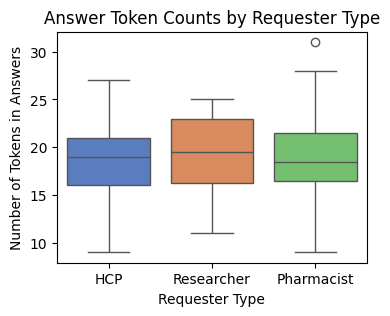

In [53]:
plt.figure(figsize=(4,3))
sns.boxplot(x='requester_type', y='answer_token_count', data=df, palette='muted')
plt.title('Answer Token Counts by Requester Type')
plt.xlabel('Requester Type')
plt.ylabel('Number of Tokens in Answers')
plt.show()


While the number of tokens in questions by requester type:
* **HCP**: The median question length for HCPs is around 14 tokens, with a relatively broad IQR ranging from about 10 to 16 tokens. This suggests that questions from HCPs vary more in length, possibly reflecting a range of question complexities.
* **Researchers**: Researchers tend to ask shorter questions on average, with a median of around 12 tokens and a narrow IQR. This indicates more consistent question lengths, likely due to a focused or standardized inquiry format.
* **Pharmacists**: Questions from Pharmacists show a slightly wider range than those from Researchers, with a median of around 13 tokens. There are also some outliers, indicating that while most questions are of moderate length, there are occasional very brief inquiries.


/tmp/ipykernel_38430/3477985629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='requester_type', y='question_token_count', data=df, palette='Set2')


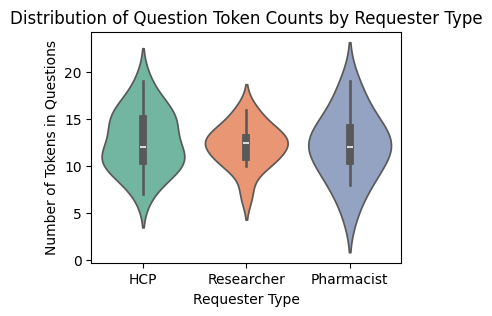

In [54]:
plt.figure(figsize=(4,3))
sns.violinplot(x='requester_type', y='question_token_count', data=df, palette='Set2')
plt.title('Distribution of Question Token Counts by Requester Type')
plt.xlabel('Requester Type')
plt.ylabel('Number of Tokens in Questions')
plt.show()


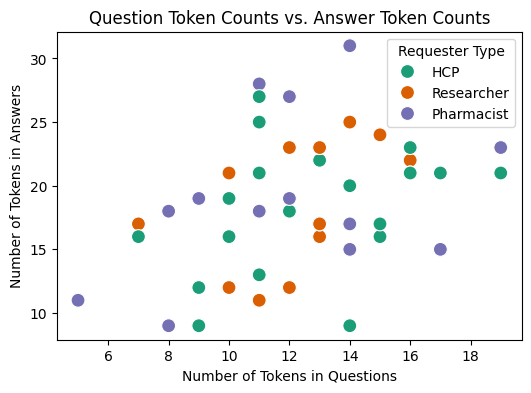

In [56]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='question_token_count', y='answer_token_count', hue='requester_type', data=df, palette='Dark2', s=100)
plt.title('Question Token Counts vs. Answer Token Counts')
plt.xlabel('Number of Tokens in Questions')
plt.ylabel('Number of Tokens in Answers')
plt.legend(title='Requester Type')
plt.show()


The majority of data points appear to cluster in the range of 10 to 16 tokens for questions and 15 to 25 tokens for answers. This suggests that most questions, regardless of the requester type, tend to be relatively concise, and the answers usually require a slightly longer response.

There appears to be a moderate positive correlation between the number of tokens in questions and the number of tokens in answers. As the length of the question increases, the length of the answer tends to increase as well. This trend is logical, as more detailed or complex questions often require more comprehensive answers.

HCPs QA's points are relatively dispersed across the plot, suggesting a wide range of question lengths and corresponding answer lengths. This reflects the diversity and variability of inquiries from HCPs, likely due to the range of medical or healthcare-related questions that require tailored responses.

Researchers QA's points tend to cluster more tightly. This suggests that both the questions and answers are more standardized or uniform in length, likely reflecting a more focused or specialized type of inquiry typical of research contexts.

Pharmacists QA points distribution shows some clustering, but also a few outliers, especially on the higher end of the answer token count. This indicates that while most inquiries from pharmacists are of moderate length, some questions lead to significantly longer responses, possibly due to the need for detailed explanations or clarifications on pharmaceutical topics.

A few outliers, particularly for Pharmacists and HCPs, show a high number of tokens in answers despite shorter questions. This might suggest cases where brief questions required more elaborate answers, perhaps due to the complexity or specificity of the topic being addressed.


These observations indicates:
1. The moderate positive correlation indicates that the length of answers is generally adapted to the length of questions. This adaptability is crucial in maintaining effective communication, particularly in fields like healthcare and research, where clarity and precision are essential.
2. The variation in data point distribution across requester types suggests that the nature of the inquiries varies by type. HCPs, for example, ask a broader range of questions that may necessitate varied response lengths, while Researchers tend to have more consistent, focused questions and answers.
3. The presence of outliers, particularly for Pharmacists, highlights the need for flexibility in response strategies. While most inquiries can be addressed concisely, some may require in-depth answers, possibly indicating areas where additional resources or specialized knowledge could be beneficial.

## Data Analysis Summary


1. The United Kingdom leads in the number of inquiries, followed by the United States and Canada. This suggests greater interest or demand in the UK, indicating a stronger market presence or a more engaged target audience. The differences might reflect variations in marketing efforts or specific needs of consumers in each location.

2. The highest number of inquiries comes from HCPs, followed by Pharmacists and Researchers. This indicates the product is highly relevant to healthcare professionals due to its connection to medical treatments or information impacting their work. Interest from Pharmacists and Researchers shows the product's scientific or clinical value is recognized in both clinical and research settings.

3. Calls are the most used channel for inquiries, significantly surpassing emails. This may indicate a preference for direct, immediate communication due to the urgency or complexity of the information requested, better handled through live conversations. It suggests that phone support is more established or perceived as more effective.

4. Pharmacists experience the highest average response time, followed by HCPs and Researchers. This suggests inquiries from Pharmacists take longer to address, possibly due to higher complexity or lower prioritization. Researchers receive answers more quickly, implying a need to evaluate processes or allocate resources to ensure efficient communication across all requester types, especially for Pharmacists.

5. Response times range from around 200 to 1,000 hours, with a peak between 500 and 700 hours—approximately a 3-week response window. The IQR is between about 600 to 800 hours, with a median around 700 hours. While response times are generally consistent, there is room for optimization to reduce the average time taken.

6. Questions typically contain between 7 to 15 tokens, peaking around 10 to 12 tokens. This indicates that questions are generally concise and straightforward, aiming to minimize ambiguity or complexity. Some inquiries require more elaboration, reflected in slightly longer questions.

7. Answers vary more in length than questions, with a peak between 15 to 20 tokens and occurrences up to 30 tokens. This variability suggests that responses depend on question complexity and the detail required, balancing concise information with comprehensive details.

8. Analysing relation between Answer Token Counts by Requester Type:
    * HCP: Median answer length is around 20 tokens, with an IQR from approximately 15 to 25 tokens, indicating moderate variability.
    * Researchers: Median length is slightly higher at around 22 tokens, with a narrower IQR, suggesting more consistency.
    * Pharmacists: Similar median to HCPs but with occasional outliers above 30 tokens, indicating generally consistent answer lengths with some longer responses for complex inquiries.

9. Analysing relation between Question Token Counts by Requester Type:
    * HCP: Median question length is around 14 tokens, with an IQR from about 10 to 16 tokens, suggesting variability in question complexity.
    * Researchers: Median length is around 12 tokens with a narrow IQR, indicating more consistent, possibly standardized inquiries.
    * Pharmacists: Median around 13 tokens, with some outliers, indicating occasional very brief or more elaborate inquiries.

10. Analysing relation between Question Token Counts vs. Answer Token Counts:
    * Most data points cluster with questions of 10 to 16 tokens and answers of 15 to 25 tokens, suggesting that questions are concise and answers are slightly longer.
    * There is a moderate positive correlation between question length and answer length; longer questions tend to receive longer answers.
    * HCP:Data points are dispersed, reflecting diversity in question and answer lengths due to varied medical inquiries requiring tailored responses.
    * Researchers: Data points cluster tightly, indicating standardized lengths typical of focused research inquiries.
    * Pharmacists: Distribution shows clustering with some outliers for longer answers, indicating that while most inquiries are moderate in length, some require significantly more detailed responses.



 Obs. This analysis is not taking into account the size of the population (which I believe is very small compared to the likely real size of the dataset), nor the possible bias in the selection of samples.